In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_34 (Conv2D)             (None, 28, 28, 64)   640         ['input_14[0][0]']               
                                                                                                  
 max_pooling2d_15 (MaxPooling2D  (None, 14, 14, 64)  0           ['conv2d_34[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_35 (Conv2D)             (None, 14, 14, 64)   36928       ['max_pooling2d_15[0][0]'] 

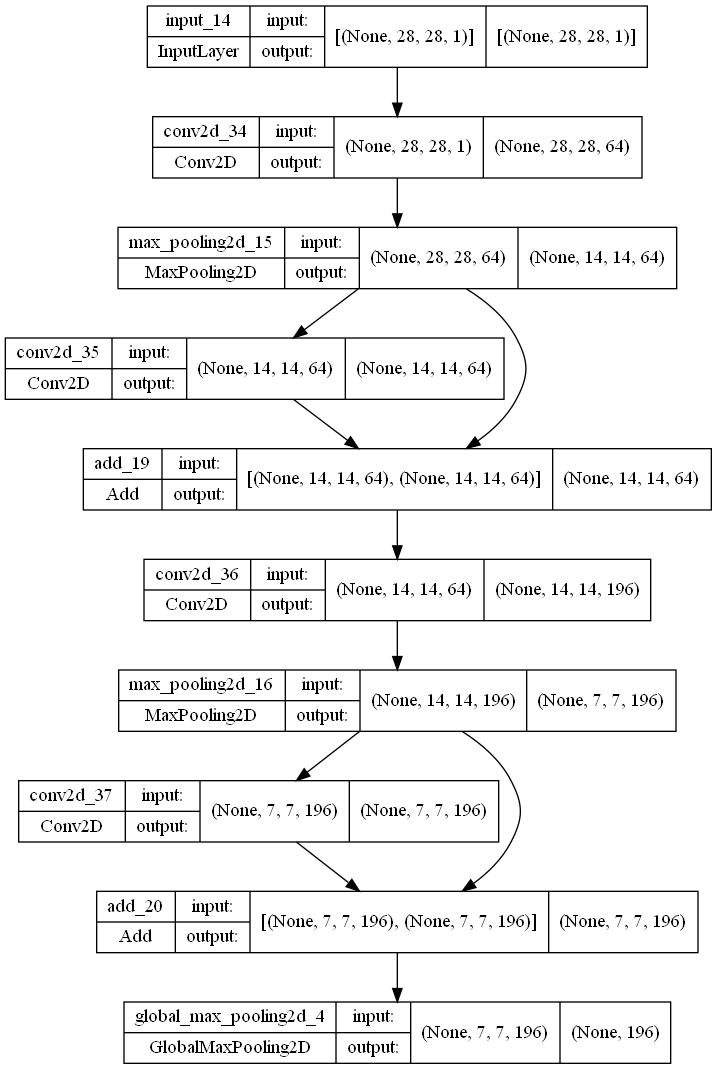

In [20]:
#Encoder
encoder_input = keras.Input(shape=(28, 28, 1))

#1st Block
x = layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu')(encoder_input)
Block1 = layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

#2nd Block
x = layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu')(Block1)
Block2 = layers.add([x, Block1])

#3rd Block
x = layers.Conv2D(filters =196, kernel_size =3, padding ='same', activation='relu')(Block2)
Block3 = layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

#4th Block
x = layers.Conv2D(filters =196, kernel_size =3, padding ='same', activation='relu')(Block3)
Block4 = layers.add([x, Block3])

encoder_output = layers.GlobalMaxPooling2D()(Block4)
encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()
keras.utils.plot_model(encoder, "Encoder.png", show_shapes=True)

Model: "decoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 196)]        0           []                               
                                                                                                  
 reshape_14 (Reshape)           (None, 14, 14, 1)    0           ['input_22[0][0]']               
                                                                                                  
 conv2d_60 (Conv2D)             (None, 14, 14, 64)   640         ['reshape_14[0][0]']             
                                                                                                  
 up_sampling2d_12 (UpSampling2D  (None, 28, 28, 64)  0           ['conv2d_60[0][0]']              
 )                                                                                          

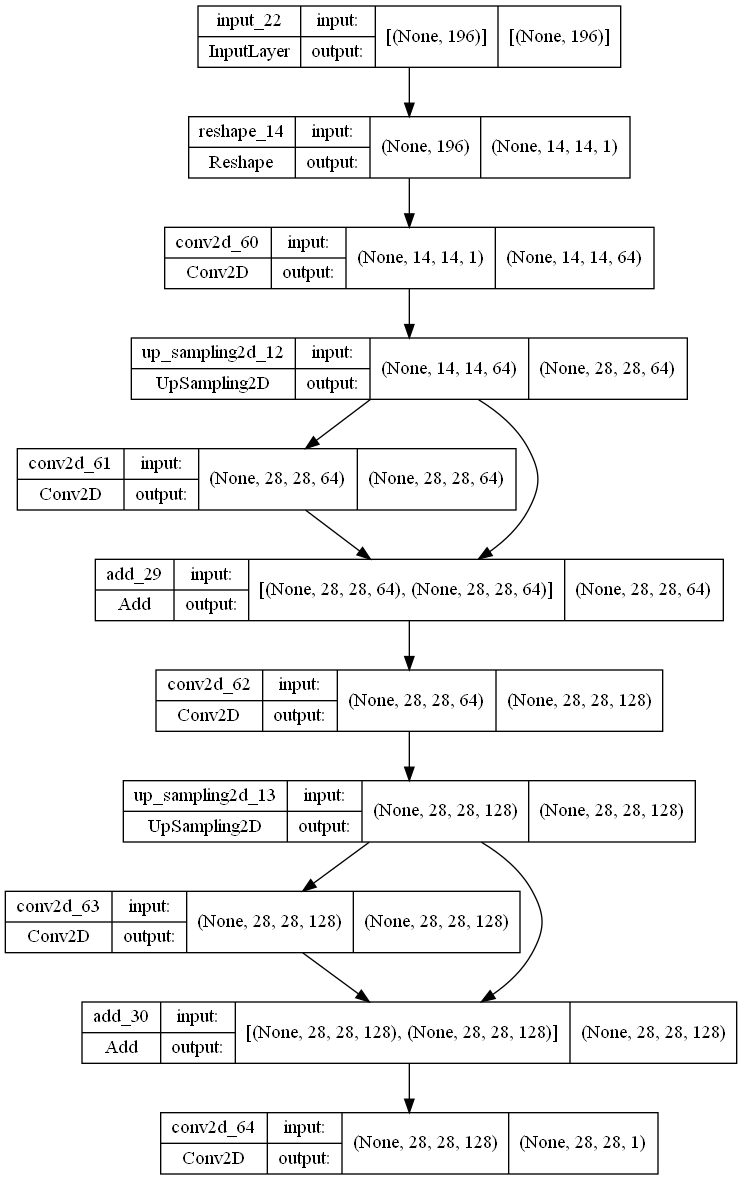

In [29]:
#Decoder
decoder_input = keras.Input(shape=(196,))
x = layers.Reshape((14,14,1))(decoder_input)

#5th Block
x = layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu')(x)
Block5 = layers.UpSampling2D(2)(x)

#6th Block
x = layers.Conv2D(filters =64, kernel_size =3, padding ='same', activation='relu')(Block5)
Block6 = layers.add([x, Block5])

#7th Block
x = layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu')(Block6)
Block7 = layers.UpSampling2D(1)(x)

#8th Block
x = layers.Conv2D(filters =128, kernel_size =3, padding ='same', activation='relu')(Block7)
Block8 = layers.add([x, Block7])

decoder_output = layers.Conv2D(filters =1, kernel_size =3, padding ='same', activation='relu')(Block8)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()
keras.utils.plot_model(decoder, "Decoder.png", show_shapes=True)

In [30]:
autoencoder_input = keras.Input(shape=(28, 28, 1))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 196)               496600    
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         260161    
                                                                 
Total params: 756,761
Trainable params: 756,761
Non-trainable params: 0
_________________________________________________________________
